In [1]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina' # I use a HiDPI screen

In [2]:
from fishchips.experiments import CMB_Primary
from fishchips.cosmo import Observables
import fishchips.cmb_lensing
import fishchips.util

from classy import Class  # CLASS python wrapper
import numpy as np
import matplotlib.pyplot as plt
default_color_list = ['#1A1A1A', '#0072B2', '#009E73', '#D55E00', '#CC79A7', '#F0E442', '#56B4E9']

# SO fischips Experiments

This returns a list of fishchips experiments used for forecasting with Simons Observatory, the list is
```
[primary,lensing,planckTEB,lowHFI]
```
This is because we expect to combine the SO CMB information with Planck.

```
fsky_mode can be 
0 - 0.1
1 - 0.2
2 - 0.4

SENS_mode can be
0 - threshold
1 - baseline
2 - goal
```

In [3]:
# SO, 0.4 fsky, goal
import so
SO_tot = so.getSO(SENS_mode=2, fsky_mode=2)

/home/zequnl/anaconda3/envs/dm_act/lib/python3.8/site-packages/fishchips-0.0.1-py3.8.egg/fishchips/experiments.py:98: RuntimeWarning: divide by zero encountered in double_scalars
/home/zequnl/anaconda3/envs/dm_act/lib/python3.8/site-packages/fishchips-0.0.1-py3.8.egg/fishchips/experiments.py:99: RuntimeWarning: divide by zero encountered in double_scalars


Generating theory Cls...
Loaded cached Cls from  output/clsAll_low_acc_False_5000_20200827.pkl
Loaded cached Cls from  output/clphi_low_acc_False_5000_20200827.txt


/home/zequnl/anaconda3/envs/dm_act/lib/python3.8/site-packages/fishchips-0.0.1-py3.8.egg/fishchips/cmb_lensing.py:45: RuntimeWarning: overflow encountered in exp
/home/zequnl/anaconda3/envs/dm_act/lib/python3.8/site-packages/orphics/lensing.py:1175: RuntimeWarning: overflow encountered in multiply
  NL = l4 *alval/ 4.
/home/zequnl/anaconda3/envs/dm_act/lib/python3.8/site-packages/orphics/lensing.py:1199: RuntimeWarning: overflow encountered in multiply
  return retval * 2. * np.nan_to_num(1. / lmap/(lmap+1.))
/home/zequnl/anaconda3/envs/dm_act/lib/python3.8/site-packages/orphics/lensing.py:1175: RuntimeWarning: overflow encountered in multiply
  NL = l4 *alval/ 4.
/home/zequnl/anaconda3/envs/dm_act/lib/python3.8/site-packages/orphics/lensing.py:1199: RuntimeWarning: overflow encountered in multiply
  return retval * 2. * np.nan_to_num(1. / lmap/(lmap+1.))
/home/zequnl/anaconda3/envs/dm_act/lib/python3.8/site-packages/orphics/lensing.py:1175: RuntimeWarning: overflow encountered in mult

planck fsky 0.2


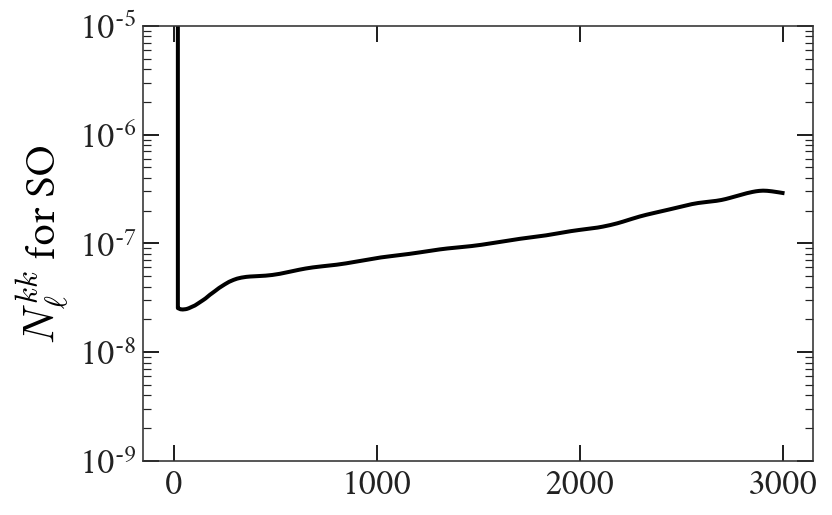

In [4]:
plt.plot(SO_tot[1].noise_k, "k-")
plt.yscale('log')
plt.ylim(1e-9,1e-5)
plt.ylabel(r'$N_{\ell}^{kk}$ for SO')

np.savetxt('output/SO_Nlkk.txt', SO_tot[1].noise_k)

Note that the large scales are set to an absurdly high noise since we don't expect to recover them.

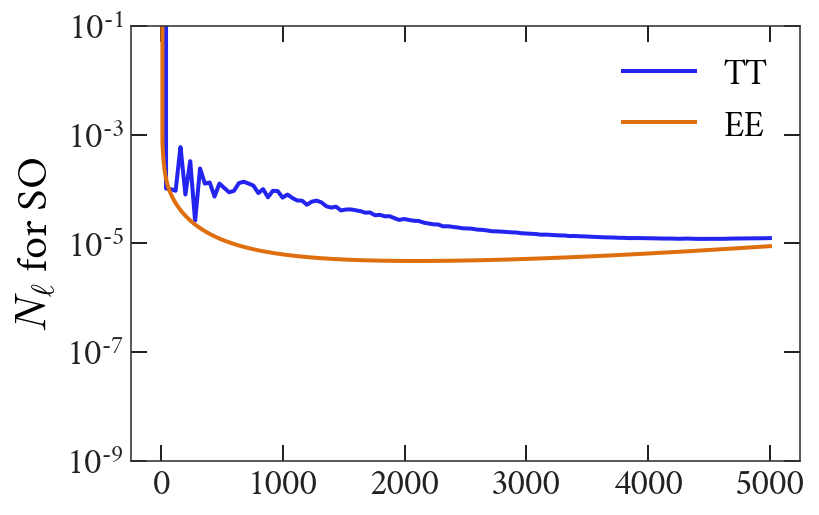

In [5]:
plt.plot(SO_tot[0].noise_T, "-", label='TT')
plt.plot(SO_tot[0].noise_P, "-", label='EE')
plt.legend()
plt.yscale('log')
plt.ylim(1e-9,1e-1)
plt.ylabel(r'$N_{\ell}$ for SO')

np.savetxt('output/SO_Nltt.txt', SO_tot[0].noise_T)
np.savetxt('output/SO_Nlee.txt', SO_tot[0].noise_P)

If you just want the noise curves, they have been saved in `output/SO_Nlxx.txt`.